[array([252.8416291 , 232.85394666, 216.86852092]), array([ 93.06384285, 196.82934316, 130.23572744]), array([167.12291772, 173.72816759, 164.92958102]), array([254.10772105, 108.41158157, 101.00249066]), array([16.18048926, 14.90423628, 13.8872315 ]), array([221.52331131, 205.26101322, 191.56626285]), array([254.99805005,   2.75181454,   2.55876936]), array([  7.14938045, 177.61886186,  83.84189995]), array([113.09100729, 101.23170402, 134.957872  ]), array([ 34.31270421,  73.68191428, 122.58821834])]


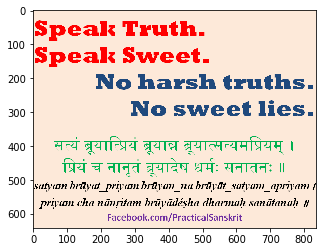

In [68]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
from sklearn.cluster import KMeans
from collections import Counter
from skimage.segmentation import flood, flood_fill

image = cv2.imread('../input/5_colours.png')
h = image.shape[0]
w = image.shape[1]

image = image[18:h-18,18:w-18]
h = h-18*2
w = w - 18*2
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
# image = Image.open('../input/5_colours.png')

modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

number_of_colors = 10
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
# hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
show_chart = True

# if (show_chart):
#     plt.figure(figsize = (8, 6))
#     plt.pie(counts.values(), labels = rgb_colors, colors = rgb_colors)

print(rgb_colors)



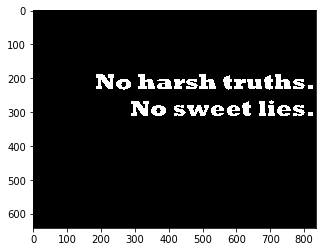

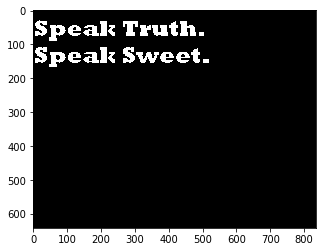

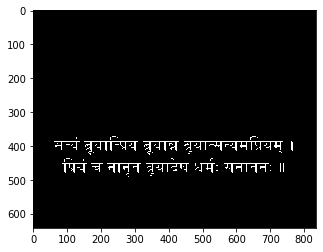

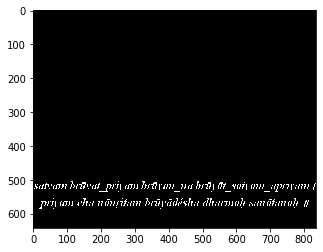

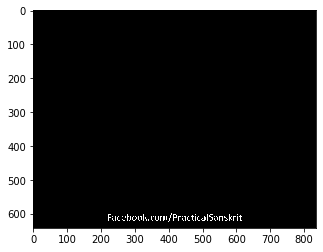

In [34]:
# 6-green 160.17411088, 170.17650581, 159.26152557
# 7-brown 125.77865044,  74.36825221,  32.89535398
# 8-blue 56.5331565 , 59.29487179, 62.70557029

color, count = np.unique(image.reshape(-1, image.shape[2]), axis=0, return_counts=True);
idx = np.flipud(np.argsort(count))
color = color[idx[1:6],:]
# print(color[0])
mask = np.zeros((5,h,w),dtype='int')

            

# blue = np.zeros((h,w))
for k in range(5):
    for i in range(h):
        for j in range(w):
            if np.array_equal(image[i,j],color[k]):
#                 print(image[i,j,:])
#                 print(color[k])
#                 print('k')
                mask[k,i,j]=1
    plt.figure()
    plt.imshow(mask[k],'gray')





In [33]:
def eightconcomp(i,j,k):
    if (i<0 or i>=h or j <0 or j>=w or marked[k,i,j]==1):
        return 0
    marked[k,i,j]=1
    if mask[k,i,j]==1:
#         obj_with_holes[i,j] = 1    
        eightconcomp(i-1,j,k)
        eightconcomp(i,j-1,k)
        eightconcomp(i,j+1,k)
        eightconcomp(i+1,j,k)
        eightconcomp(i-1,j-1,k)
        eightconcomp(i+1,j+1,k)
        eightconcomp(i+1,j-1,k)
        eightconcomp(i-1,j+1,k)
        
    return 0
    
    
marked = np.zeros((5,h,w))
count = []
cnt=0
k = 0
for i in range(h):
    for j in range(w):
        if marked[k,i,j]==0 and mask[k,i,j]==1:
            eightconcomp(i,j,k)
            cnt = cnt+1
count.append(cnt)

cnt=0
k = 1
for i in range(h):
    for j in range(w):
        if marked[k,i,j]==0 and mask[k,i,j]==1:
            eightconcomp(i,j,k)
            cnt = cnt+1
count.append(cnt)
     
cnt=0    
k = 2
for i in range(h):
    for j in range(w):
        if marked[k,i,j]==0 and mask[k,i,j]==1:
            eightconcomp(i,j,k)
            cnt = cnt+1
count.append(cnt)

cnt=0
k = 3
for i in range(h):
    for j in range(w):
        if marked[k,i,j]==0 and mask[k,i,j]==1:
            eightconcomp(i,j,k)
            cnt = cnt+1
count.append(cnt)

cnt=0
k = 4
for i in range(h):
    for j in range(w):
        if marked[k,i,j]==0 and mask[k,i,j]==1:
            eightconcomp(i,j,k)
            cnt = cnt+1
count.append(cnt)            
print('no of components')                
print(count)    

no of components
[27, 24, 74, 241, 34]


70


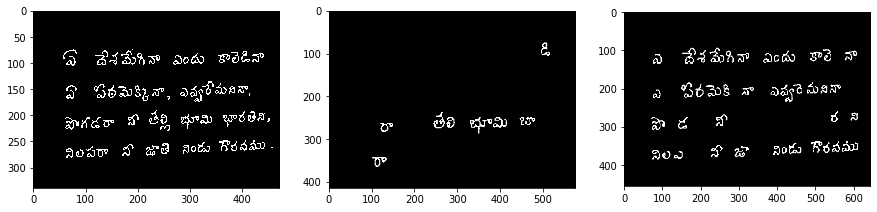

In [85]:
#part 2

im1 = cv2.imread('../input/telugu1.jpeg',0)
im2 = cv2.imread('../input/telugu2.jpeg',0)
# plt.figure(figsize=(20, 20))
# plt.imshow(im1, cmap='gray')


def eightconcomptelg(i,j,marked_t,binarised,label_cnt):
    if (i<0 or i>=h1 or j <0 or j>=w1 or marked_t[i,j]==1):
        return 0
    marked_t[i,j]=1
    label[i,j]=label_cnt
    if binarised[i,j]==1:
#         obj_with_holes[i,j] = 1 
        eightconcomptelg(i-1,j,marked_t,binarised,label_cnt)
        eightconcomptelg(i,j-1,marked_t,binarised,label_cnt)
        eightconcomptelg(i,j+1,marked_t,binarised,label_cnt)
        eightconcomptelg(i+1,j,marked_t,binarised,label_cnt)
        eightconcomptelg(i-1,j-1,marked_t,binarised,label_cnt)
        eightconcomptelg(i+1,j+1,marked_t,binarised,label_cnt)
        eightconcomptelg(i+1,j-1,marked_t,binarised,label_cnt)
        eightconcomptelg(i-1,j+1,marked_t,binarised,label_cnt)
        
    return 0
hole1 = cv2.imread('../input/hole1.png',0)
hole2 = cv2.imread('../input/hole2.png',0)

def no_holes(i,j,marked_h,filled):
    if (i<0 or i>=h1 or j <0 or j>=w1 or marked_h[i,j]==1):
        return 0
    marked_h[i,j]=1
#     label[i,j]=label_cnt
    if filled[i,j]==1:
#         obj_with_holes[i,j] = 1 
        eightconcomptelg(i-1,j,marked_h,filled)
        eightconcomptelg(i,j-1,marked_h,filled)
        eightconcomptelg(i,j+1,marked_h,filled)
        eightconcomptelg(i+1,j,marked_h,filled)
        eightconcomptelg(i-1,j-1,marked_h,filled)
        eightconcomptelg(i+1,j+1,marked_h,filled)
        eightconcomptelg(i+1,j-1,marked_h,filled)
        eightconcomptelg(i-1,j+1,marked_h,filled)
        
    return 0


height = im1.shape[0]
width = im1.shape[1]
binarised = cv2.adaptiveThreshold(im1,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,7)
binarised = binarised[:,0:width-130]


# binarised = bib

h1 = binarised.shape[0]
w1 = binarised.shape[1]


# print(np.amax(binarised))

# bg_ = 1- binarised

marked_t=np.zeros((h1,w1))
label = np.zeros((h1,w1))
label_cnt=0
marked_h=np.zeros((h1,w1))

for i in range(h1):
    for j in range(w1):
        if binarised[i,j]==1 and marked_t[i,j]==0:
            label[i,j]= label_cnt
            eightconcomptelg(i,j,marked_t,binarised,label_cnt)
            label_cnt+=1

print(label_cnt)            
hole__1 = cv2.imread('../input/hole__1.png',0)
hole__2 = cv2.imread('../input/hole__2.png',0)

p=1
temp_im = np.zeros((label_cnt+1,h1,w1))
hole1_labels=[]
hole2_labels=[]
for i in range(1,label_cnt+1):
    holes = 0
    for j in range(h1):
        for k in range(w1):
            if label[j,k]==i:
                temp_im[i,j,k]=1
    filled = flood_fill(temp_im[i], (0, 0), 1)
    filled = np.invert(filled.astype("bool")) * 1
    for l in range(h1):
        for m in range(w1):
            if marked_h[l,m]==1 and filled[l,m]==1:
                holes = no_holes(l,m,marked_h,filled)
            if holes ==1:
                hole1_labels.append(i)
            if holes ==2:
                hole2_labels.append(i)
        
#     if p==1:    
#         plt.figure()
#         plt.imshow(filled,'gray')
#         p=0

#hole 1
hole_1 = np.zeros((h,w))
for i in hole1_labels:
    for j in range(h1):
        for k in range(w1):
            if label[j,k]==i:
                hole_1[j,k]=1
                
                

#hole 2
hole_2 = np.zeros((h,w))
for i in hole2_labels:
    for j in range(h1):
        for k in range(w1):
            if label[j,k]==i:
                hole_2[j,k]=1                
                
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(binarised,'gray')
plt.subplot(1,3,2)
plt.imshow(hole1,'gray')
plt.subplot(1,3,3)
plt.imshow(hole2,'gray')





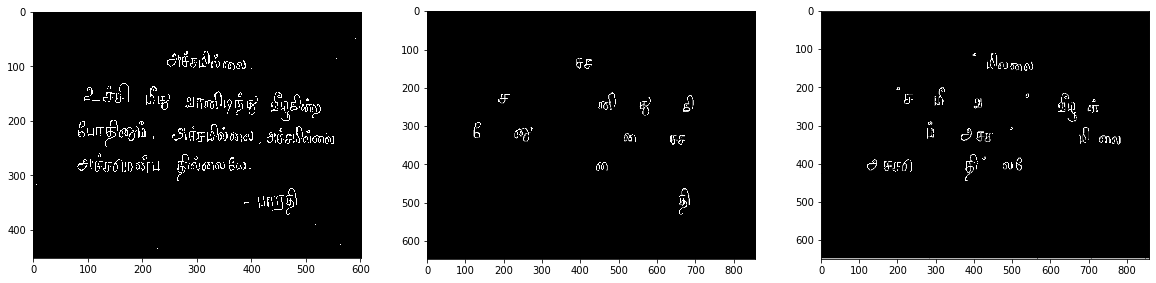

In [87]:
bin2 = cv2.adaptiveThreshold(im2,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,7)


def no_holes(i,j,marked_h,filled):
    if (i<0 or i>=h1 or j <0 or j>=w1 or marked_h[i,j]==1):
        return 0
    marked_h[i,j]=1
#     label[i,j]=label_cnt
    if filled[i,j]==1:
#         obj_with_holes[i,j] = 1 
        eightconcomptelg(i-1,j,marked_h,filled)
        eightconcomptelg(i,j-1,marked_h,filled)
        eightconcomptelg(i,j+1,marked_h,filled)
        eightconcomptelg(i+1,j,marked_h,filled)
        eightconcomptelg(i-1,j-1,marked_h,filled)
        eightconcomptelg(i+1,j+1,marked_h,filled)
        eightconcomptelg(i+1,j-1,marked_h,filled)
        eightconcomptelg(i-1,j+1,marked_h,filled)
        
    return 0

for i in range(1,label_cnt+1):
    holes = 0
    for j in range(h1):
        for k in range(w1):
            if label[j,k]==i:
                temp_im[i,j,k]=1
    filled = flood_fill(temp_im[i], (0, 0), 1)
    filled = np.invert(filled.astype("bool")) * 1
    for l in range(h1):
        for m in range(w1):
            if marked_h[l,m]==1 and filled[l,m]==1:
                holes = no_holes(l,m,marked_h,filled)
            if holes ==1:
                hole1_labels.append(i)
            if holes ==2:
                hole2_labels.append(i)
        


plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(bin2,'gray')
plt.subplot(1,3,2)
plt.imshow(hole__1,'gray')
plt.subplot(1,3,3)
plt.imshow(hole__2,'gray')
